# Neural Network for Sentiment Analysis

## Experimenting with TF-IDF BoW

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import dill as pickle
from nn import neuralNetwork
from train_test import train_nn, evaluate_nn,hyperparameter_tuning

### Loading data

In [3]:
training_file = "./sephora-data/sa-reviews_training.csv"
dev_file = "./sephora-data/sa-reviews_dev.csv"
test_file = "./sephora-data/sa-reviews_test.csv"

In [4]:
df_training = pd.read_csv(training_file)
df_dev = pd.read_csv(dev_file)
df_test = pd.read_csv(test_file)

In [5]:
#there is a review in Russian that after many trials, is still being saved in the final file
df_training.dropna(inplace=True) 
df_training = df_training.reset_index(drop = True)

### Extracting Data as BoW, unigrams

In [6]:
# trigrams
vectorizer = TfidfVectorizer(min_df=10)

# Fit and transform the text data
feat_vectorized_train = vectorizer.fit_transform(df_training['preprocessed_text'])
gold_labels_train = df_training['label'].to_numpy()
feat_vectorized_dev = vectorizer.transform(df_dev['preprocessed_text'])
gold_labels_dev = df_dev['label'].to_numpy()
feat_vectorized_test = vectorizer.transform(df_test['preprocessed_text'])
gold_labels_test = df_test['label'].to_numpy()

In [7]:
feat_vectorized_train.shape

(33934, 3494)

### Reducing dimensionality of feature vector

In [8]:
desired_dimension = 300
svd = TruncatedSVD(n_components=desired_dimension)
feat_vectorized_train_svd = svd.fit_transform(feat_vectorized_train)
feat_vectorized_dev_svd = svd.transform(feat_vectorized_dev)
feat_vectorized_test_svd = svd.transform(feat_vectorized_test)

In [9]:
feat_vectorized_train_svd.shape

(33934, 300)

### Defining the Neural Network parameters

In [10]:
# number of input, hidden and output nodes
input_nodes = desired_dimension #this is the size of the features
hidden_nodes = 100
output_nodes = 1

# learning rate
learning_rate = 0.01

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

### Training the Neural Network

Epoch 1/10, Elapsed Time: 0:00:03, Accuracy: 0.8404844698532445
Epoch 2/10, Elapsed Time: 0:00:02, Accuracy: 0.8488536570990747
Epoch 3/10, Elapsed Time: 0:00:03, Accuracy: 0.8505039193729004
Epoch 4/10, Elapsed Time: 0:00:03, Accuracy: 0.8513879884481641
Epoch 5/10, Elapsed Time: 0:00:03, Accuracy: 0.8515942712323923
Epoch 6/10, Elapsed Time: 0:00:02, Accuracy: 0.8518300229857959
Epoch 7/10, Elapsed Time: 0:00:03, Accuracy: 0.8517121471090942
Epoch 8/10, Elapsed Time: 0:00:03, Accuracy: 0.8516532091707432
Epoch 9/10, Elapsed Time: 0:00:03, Accuracy: 0.8518594919549715
Epoch 10/10, Elapsed Time: 0:00:02, Accuracy: 0.8519184298933223


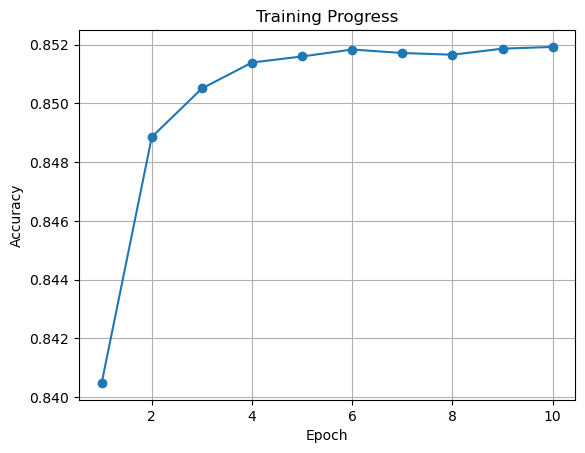

In [11]:
epochs = 10
nn_trigram_bow = train_nn(n, feat_vectorized_train_svd, gold_labels_train, epochs)

In [12]:
# saving the trained neural network to a file
pkl_filename = './models/nn_tfidf_bow_model.pkl'
with open(pkl_filename, 'wb') as file:
     pickle.dump(nn_trigram_bow, file)

#saving the vectorizer for reproducibility
vec_filename = 'models/nn_tfidf_bow_vectorizer.pkl'
with open(vec_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

### Evaluating the perfomance on validation set

In [13]:
# load from file
with open(pkl_filename, 'rb') as file:
    nn_tfidf_bow_model = pickle.load(file)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2986
           1       0.83      0.86      0.85      3003

    accuracy                           0.85      5989
   macro avg       0.85      0.85      0.85      5989
weighted avg       0.85      0.85      0.85      5989

[[2472  514]
 [ 406 2597]]


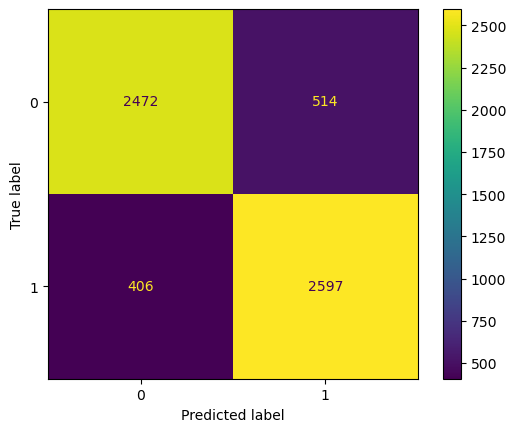

In [14]:
evaluate_nn(nn_tfidf_bow_model, feat_vectorized_dev_svd, gold_labels_dev)

### Hyperparameter tuning on best performing model: TF-IDF

In [10]:
input_nodes = desired_dimension #this is the size of the feature vector
output_nodes = 1

#defining the hyperparameters and their possible values
param_grid = {
    'hidden_nodes': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'epochs': [5, 10, 15]   
}

best_parameters = hyperparameter_tuning(input_nodes, output_nodes, feat_vectorized_train_svd, gold_labels_train, feat_vectorized_dev_svd, gold_labels_dev, param_grid)

Performance: 0.8320253798630823
Hidden nodes: 100
Learning rate: 0.1
Number of epochs: 5

Performance: 0.838537318417098
Hidden nodes: 100
Learning rate: 0.1
Number of epochs: 10

Performance: 0.8430455835698781
Hidden nodes: 100
Learning rate: 0.1
Number of epochs: 15

Performance: 0.8443813658373686
Hidden nodes: 100
Learning rate: 0.01
Number of epochs: 5

Performance: 0.8460510936717315
Hidden nodes: 100
Learning rate: 0.01
Number of epochs: 10

Performance: 0.8458841208882952
Hidden nodes: 100
Learning rate: 0.01
Number of epochs: 15

Performance: 0.8361996994489899
Hidden nodes: 100
Learning rate: 0.001
Number of epochs: 5

Performance: 0.8438804474870596
Hidden nodes: 100
Learning rate: 0.001
Number of epochs: 10

Performance: 0.848555685423276
Hidden nodes: 100
Learning rate: 0.001
Number of epochs: 15

Performance: 0.8169978293538154
Hidden nodes: 200
Learning rate: 0.1
Number of epochs: 5

Performance: 0.8245116046084489
Hidden nodes: 200
Learning rate: 0.1
Number of epochs: 

### Training and Evaluation on test data with the best parameters

Epoch 1/10, Elapsed Time: 0:00:05, Accuracy: 0.6902811339659338
Epoch 2/10, Elapsed Time: 0:00:04, Accuracy: 0.7895620911180526
Epoch 3/10, Elapsed Time: 0:00:04, Accuracy: 0.8207402605056875
Epoch 4/10, Elapsed Time: 0:00:04, Accuracy: 0.8317027170389579
Epoch 5/10, Elapsed Time: 0:00:04, Accuracy: 0.8366240348912595
Epoch 6/10, Elapsed Time: 0:00:04, Accuracy: 0.841545352743561
Epoch 7/10, Elapsed Time: 0:00:04, Accuracy: 0.8437849944008958
Epoch 8/10, Elapsed Time: 0:00:04, Accuracy: 0.8455531325514234
Epoch 9/10, Elapsed Time: 0:00:04, Accuracy: 0.8467024223492662
Epoch 10/10, Elapsed Time: 0:00:04, Accuracy: 0.8471444568868981


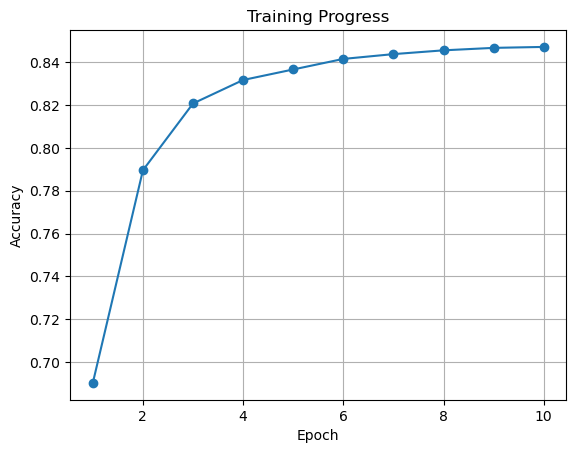

In [13]:
# number of input, hidden and output nodes
input_nodes = desired_dimension #this is the size of the features
hidden_nodes = 200
output_nodes = 1

# learning rate
learning_rate = 0.001

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

epochs = 10
nn_tfidf_bow = train_nn(n, feat_vectorized_train_svd, gold_labels_train, epochs)

In [14]:
# rewriting the trained neural network after hyperparameter tuning
pkl_filename = './models/nn_tfidf_bow_model.pkl'
with open(pkl_filename, 'wb') as file:
     pickle.dump(nn_tfidf_bow, file)

In [15]:
# load from file
with open(pkl_filename, 'rb') as file:
    nn_tfidf_bow_model = pickle.load(file)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4993
           1       0.86      0.84      0.85      4988

    accuracy                           0.85      9981
   macro avg       0.85      0.85      0.85      9981
weighted avg       0.85      0.85      0.85      9981

[[4285  708]
 [ 804 4184]]


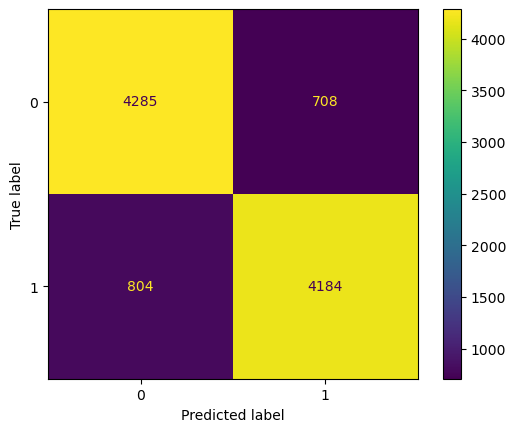

In [16]:
evaluate_nn(nn_tfidf_bow_model, feat_vectorized_test_svd, gold_labels_test)